### INE 410146 - Applied Machine Learning
$\textbf{Author: Prof. Mateus Grellert}$

Bibliographic references used in this lesson:
- Aggarwal, Charu C. Data Mining: The Textbook, Chapter 2.4
- Han, J., Kamber, M. Data Mining: Concepts and Techniques, Chapter 3.4
- Tan, P.-N. et al. Introduction to Data Mining, Appendix B

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings

warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings("ignore", message="MatplotlibDeprecationWarning")


# 6 - Dimensionality Reduction

As we've seen in previous lessons, our data sets are composed of instances that represent the data records used to train models. Each instance is formed of feature vectors and sometimes we also have a class/regression variable whose outcome we want to predict.

In the context of Machine Learning, **dimensionality** is a term that refers to the number of features or instances of a data set. Data sets with too many features or instances are said to have a high dimensionality.

The effects of high-dimensional data are usually negative:
 - Having too many dimensions increases the chance of model **[Overfitting](https://en.wikipedia.org/wiki/Overfitting)**. We will come back to this term in future lessons. For now you just need to know that an overfit model is one that works very well in the training samples, but performs poorly on unseen data (we then say that it didn't **generalize** well). More features mean more flexibility for models to adjust to particularities in our training samples in order to minimize the loss function. This can be solved with regularization mechanisms, but reducing the feature space is also a possible countermeasure.
 - High dimensionality also leads to long (even prohibitive) training/inference times. This is specially important when there are a lot of experiments to perform and when the data is also high-dimensional in terms of instances. Some Deep Learning models take weeks or months depending on the data set and the DNN architecture. Even traditional models struggle with high-dimensional data.
 - Fewer dimensions are also important for visualization purposes, since we can only visualize spaces with three or less dimensions.
 
Therefore, we need to somehow reduce the dimensions of our data in order to improve the effects of our training process. The challenge is to generate a smaller representation while maintaining the important information that will be important when training our models. 

High dimensionality is usually unwanted in both directions, but most discussions and techniques available focus on reducing the dimensionality of our feature vectors. We will briefly discuss the overall reduction techniques and focus  on feature reduction in this lesson. We can separate them in the following groups:

- Instance sampling: this is an instance-based reduction approach that works by selecting a subset of the samples in our data set. This can be done completely at random, with or without replacement. When outliers are unwanted, random sampling without replacement is usually preferred. Another approach involves sampling based on instance importance. In time-series, the most recent features can be more important than older records. Finally, we can also perform a stratified sampling, in which we ensure that some features will keep the same distribution. For instance, suppose we need to extract M samples from our data while keeping the same number or records for each gender identity. We can partition our data set into the $N$ gender categories and then sample $M/N$ entries of each.
- Feature Selection: this was discussed in Lesson 5. It consists of removing irrelevant or redundant features using metrics like variance or model importance.
- Change of Basis: correlations among features are exploited to represent data with smaller dimensions. This can be done with linear and with non-linear models. We will see more of those in the following sections.
- Domain transformation: we can also use transforms to change the representation domain of our data and this can actually lead to a compressed version of it. More about this will also be covered in this lesson.
- Deep Learning: using special DNN models like Autoencoders (AE) and Generative Adversarial Networks (GAN), we can create a smaller representation of our data that is much smaller in terms of dimensional.

The reduction techniques that we will see in this lesson work by reducing the dimension by creating a compact representation that still keeps the important information in it. This is usually referred to as **intrinsic** or **latent** representation. Now let's see the main techniques used for this in the diagram below.

<center> <img src=https://miro.medium.com/max/2000/1*WhKA9Jboj_1sHa0MbWQQ7w.png width=70%/> <br /> (source: Towards Data Science - <a href=https://miro.medium.com/max/2000/1*WhKA9Jboj_1sHa0MbWQQ7w.png>link</a>)</center>

We can see that there are several options for reducing data without having to explicitly remove features. These methods are divided into two categories: linear and non-linear reduction. When our data has non-linear relationships among its features, we need to use non-linear methods as well, otherwise we will be missing important information (this will be clear in the following sections). In the diagram above, Deep Learning methods were not included, but they would fall into the non-linear reduction as well.

The advantage of using these methods for dim. reduction is that we can **maintain the information** from all our features, but at the same time we are mapping them to a different basis/domain, so we are missing a lot of **interpretability**. Now let's see a little bit about each of these types, starting with the most simple one.



## 6.1 - Linear projections - PCA 

Let's start with a very simple scenario in which we have two features in our data set (F1 and F2) that have a significant correlation between them. The figure below shows an illustration of this.

2D feature space | Direction that maximizes Variance
- | - 
![alt](FIGS/6-linear_scatter.png) | ![alt](FIGS/6-PCA.png)

If we want to represent a compact representation that gives us an overall idea, we are actually trying to find a model that maximizes the covariance of this distribution. The covariance is simply a generalization of variance for multidimensional data and is tightly related to correlation (including in its formulation). The idea is that we want to find the direction in which data spreads the most, because in doing that we are wrapping its structure.

The **Principal Component Analysis (PCA)** solves that problem using mathematical properties of the covariance matrix. It performs an eigendecomposition of this matrix, generating the eigenvectors that are oriented in the directions that maximize the variance. These eigenvectors are the principal components themselves. If we remember the linear algebra lessons, we will recall that eingevectors are orthogonal to each other. In other words, each principal component is linearly uncorrelated to the other, so the variance explained in the first one is not accounted in the variance explained by the second one and so on, so each components explains a bit more of our data (the first component explaining most of it). The figure below illustrates this concept.

<center>
<img src="FIGS/6-PCA-2.png" width="80%vw"/>
        (source: <a src="http://pmaweb.caltech.edu/~physlab/lab_21_current/Ph21_5_Covariance_PCA.pdf">Caltech</a>)
</center>

When we represent these two features with a single principal component, for instance, we are performing a dimensionality reduction. This may not seem obvious because our feature set is small, but PCA can be used to map thousands of features into a few hundred principal components only and considerably reduce training size.


Now let's implement the PCA in practice. We will simulate this using the ``iris`` data set of ``scikit-learn`` package. PCA is sensitive to data scaling, so we will first scale it using the ``MinMaxScaler``. We will create a PCA with $2$ components, reducing the dimensionality of our data by 50%.

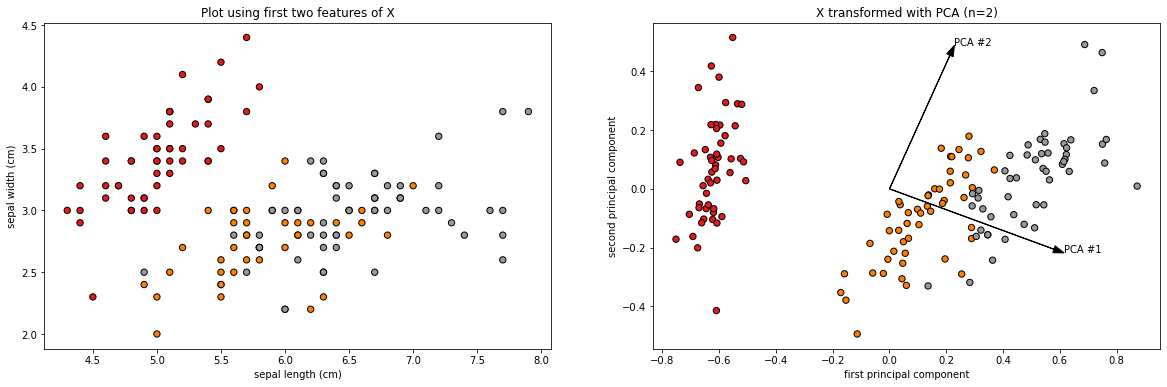

In [6]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# function for drawing the PCA component directions
def draw_vector(v0, v1, ax=None, legend = ''):
    ax = plt.gca() or ax
    ax.arrow(v0[0], v0[1], v1[0], v1[1], shape='full', lw=1, length_includes_head=True, head_width=.025, fc = 'k' )
    ax.annotate(legend, xy=v1)


# loading the iris data set
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# scaling our data to work well with PCA
X_scaled = MinMaxScaler().fit_transform(X)

# The PCA object can be parameterized, the most important parameter is the number of principal components
# we will use 2 so that we can plot a 2D chart of the transformed data
pca = PCA(n_components=2)

# the fit() method computes the model parameters
# the transform() method transforms the input into its mapped version
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)


# plotting the original and the PCA data
fig, axes = plt.subplots(1,2,figsize = (20, 6))

axes[0].scatter(X[:,0], X[:,1],    
            c=y,
            cmap=plt.cm.Set1,
            edgecolor="k",
            s=40,)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title("Plot using first two features of X")

axes[1].scatter(X_reduced[:,0], X_reduced[:,1],    
            c=y,
            cmap=plt.cm.Set1,
            edgecolor="k",
            s=40,)

axes[1].set_xlabel("first principal component")
axes[1].set_ylabel("second principal component")
axes[1].set_title("X transformed with PCA (n=2)")

# plotting PCA vectors
i = 1
for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):
    # the lenght our vectors is proportional to sqrt(eigenvalue)
    v = eigenvector * 3 * np.sqrt(eigenvalue)
    draw_vector([0,0],  v[:2], ax = axes[1],legend = f'PCA #{i}' )
    i+=1


Note that our data is much more separable once we apply PCA. Of course this is a simple example to prove the concept and the power of this technique. In most practices scenarios, data is not separable even if we use many components. 

Each principal component is a linear combination of our input features. We can actualize check the weights used in each component as a way of measuring the importance of each feature in explaining our data.




In [8]:
for i,pc in enumerate(pca.components_):
    print(f'Component #{i+1}')
    for name,val in zip(iris.feature_names,pc):
        print(f'{name}:  {np.round(val,3)}')

Component #1
sepal length (cm):  0.425
sepal width (cm):  -0.151
petal length (cm):  0.616
petal width (cm):  0.646
Component #2
sepal length (cm):  0.423
sepal width (cm):  0.904
petal length (cm):  -0.06
petal width (cm):  -0.01


Note that the first component has a strong influence from the petal length, petal width, and sepal length. For the second component, the sepal width becomes the most important one, and the petal length/width become irrelevant. This is because each component is orthogonal to another, meaning that the second component will handle only a subset of the distribution of our data. Therefore, features that were previously irrelevant can become quite important. This is **another reason for us not to eliminate features without careful consideration**. While they might be useless for the original distribution of our data set, they might become relevant once are a dealing with a subset of its structure.

We can also see the amount of explained variance of each component. Note that most of the variance is explained by the first one, and the following ones become gradually less explanatory.

Text(0, 0.5, 'explained variance')

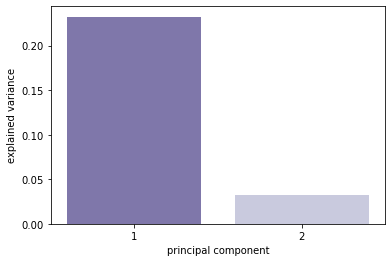

In [4]:
import seaborn as sns

sns.barplot(x = np.arange(1,3), y = pca.explained_variance_, palette = 'Purples_r')
plt.xlabel('principal component')
plt.ylabel('explained variance')



## 6.2 - Manifold Learning - Isomaps

Although PCA can be very effective, it can only do linear transformations in our data. When our features have a nonlinear relationship, we need to use different approaches if we want to make the most of our dimensionality reduction process.

That is where **Manifold Learning** comes to play. The idea is to represent data with complex structures using embedded manifolds, which are topological representations that locally resemble the euclidean space. A simple example of manifold is the atlas. Instead of representing the earth as a spherical representation, we can simply create several 2D projections (which are approximately planar). If we want to produce the sphere from those atlases, we can simply combine all the atlas images and deform them a bit to give us the original structure.

Manifolds became more important in the ML field because of the **Manifold Hypothesis**, which states that real-world high-dimensional data is actually a set of low-dimensional manifolds embedded in the high-dimensional space. You can read more on manifolds [here](https://deepai.org/machine-learning-glossary-and-terms/manifold-hypothesis) and [here](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/).

In this lesson, we will abstract the mathematical detail and focus on the application of manifolds to map complex structures with non-linear relationship in their dimensions. The ``scikit-learn`` package contains several manifold implementations. We will use one of the first ones called **Isomap**. It computes a lower-dimensional representation that preservers the **geodesic distance** as well as possible. The idea here is that complex structures have non-linear surfaces, so the eucliden distance is not efficient to represent how samples are actually close to each other. The figure below shows an illustration of this idea.

<center><img src="https://miro.medium.com/max/4800/1*aYWSrrOmC5OyZHRFuFm4Hg.png" width=40% /> <br>  (source: Towards Data Science - <a href=https://towardsdatascience.com/isomap-embedding-an-awesome-approach-to-non-linear-dimensionality-reduction-fc7efbca47a0> link</a>)</center>

Let's work on some code and see how this translates to practice. We will use a special data set with a 3D swiss roll. It has a non-linear structure and its great to show how manifold learning works.

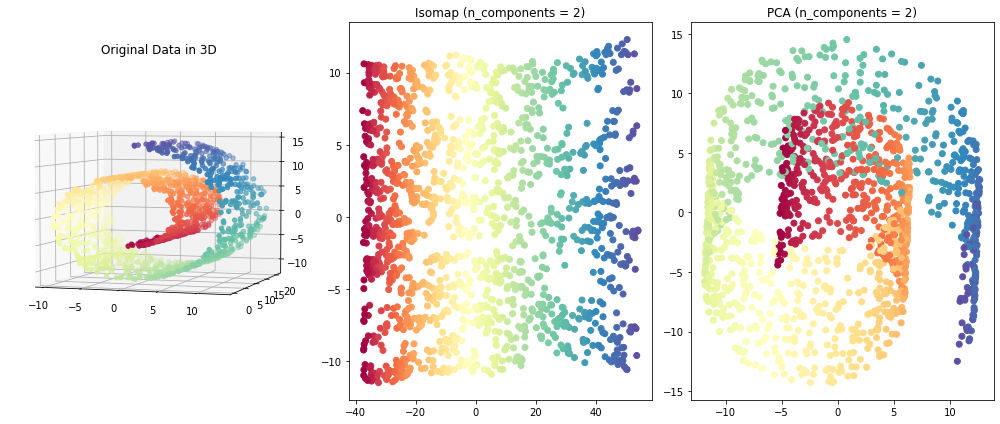

In [10]:
# code adapted from: https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

n_points = 1500
X, color = datasets.make_swiss_roll(n_points)
n_neighbors = 10
n_components = 2

pca = PCA( n_components=n_components)
X_pca = pca.fit_transform(X)


isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_iso = isomap.fit_transform(X)


# ploting
fig = plt.figure(figsize = (14,6))
ax0 = fig.add_subplot(1,3,1, projection="3d")
ax1 = fig.add_subplot(1,3,2, )
ax2 = fig.add_subplot(1,3,3, )

ax0.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax0.view_init(4, -72)

ax1.scatter(X_iso[:, 0], X_iso[:, 1], c=color, cmap=plt.cm.Spectral)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)

ax0.set_title('Original Data in 3D')
ax1.set_title('Isomap (n_components = 2)')
ax2.set_title('PCA (n_components = 2)')

plt.tight_layout()
plt.show()


As we can see in the plots, the PCA transformation tries to keep the form of our swiss roll, but the produced projection overlaps the red and green samples (the visualization can differ each time you run this cell). The distance that was present in the original was completely lost in this case. The Isomap, on the other hand, sort of untangled the swiss roll into a planar version, keeping the original distances intact.


## 6.3 - Transforms

In these methods, operations such as wavelet and DFT transforms are used to map our data to another domain. Transforms are widely used in dependency-oriented data (like images and time series). The results after this rotation are called coefficients and are no longer space or time dependent, so the data can be processed like any other multimensioal data.

The output of a transforms is of the same size as the input data, so you might be wondering how this strategy can be used for dimensionality reduction. What happens is that most transform coefficients are really close to zero, because transforms also have the property of compacting most information in just a few values. Therefore, we can only keep the most important ones. 

Two transforms are commonly used in time series: DFT and Wavelets. According to Aggarwal, DFT is more recommended when the series has a global periodicity, whereas Wavelets are more suitable when the time series has local variations only. The figure below illustrates this notion.

<center>
<img src="FIGS/6-DFTvsWavelet.png") width=40% /><br/> (source: Data Mining: the Textbook,  Aggarwal, C.)
</center>

Both DFT and wavelets are not directly useful for feature extraction and dim. reduction. To use them as possible features, we must perform a **decomposition**, meaning we compute them at different frequency subbands. Each subband represents a frequency interval, and this is usually important for pattern recognition, because some patterns are present only on specific frequency subbands. 

<center>
<img src="https://ataspinar.com/wp-content/uploads/2018/09/multilevel_coefficients_schematic.png") width=50% /><br/> (source: <a href="https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/">link</a>)
</center>

The idea is that each decomposed component becomes a feature. We can **truncate** the transformed coefficients, keeping only the ones with high amplitudes, to ensure a reduced dimension is also achieved.


## 6.4 - Autoencoders

Last, but not least, we can also use a special type of Neural Network called **Autoencoders (AE)**. These types of networks are  formed by two components: an Encoder (E) and a Decoder (D), each of them formed by one or more hidden layers (these terms will become more clear once we see Neural Networks in our course). The figure below shows a typical Autoencoder architecture.

<center>
<img src="https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png") width=50% /><br/> (source: <a href="https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798/">TWDS</a>)
</center>

While the encoder layer works to compress the input information while keeping its important features, the decoder layer is trained to reconstruct the original data using the compressed values as input. Between the E and D layers, we have what is called a **bottleneck** layer, which represents the intrinsic values or latent space of our high-dimensionality data.

Autoencoders are widely used in denoising and data compression, and they are increasingly being used for dimensionality reduction as a preprocessing step for other algorithms as well (using the bottleneck layer as input for training).

### Autoencoders vs PCA implementation

I was writing a code example of Autoencoders vs PCA, when I stumbled upon this excellent [notebook](https://github.com/samread81/PCA-versus-AE/blob/master/Workbook_upload.ipynb) from this [blog post](https://towardsdatascience.com/dimensionality-reduction-pca-versus-autoencoders-338fcaf3297d), so I suggest you to copy this notebook, read its content, and run all of its cells for a comparison between PCA and Autoencoders for dimensionality reduction of image data. The idea was to reduce the dimensionality of a $360\times460$ image to 10% of its size in the column dimension (460 to 46), leading to a **90% reduction**.

The author compared PCA with a three-layered Autoencoder, using the ``keras`` deep learning framework to implement the latter. The AE used layers with sizes (460, 128, 46, 128, 460). The first two ones are the Encoder part, the middle one is the bottleneck, and the last two ones form the Decoder part. We will once again abstract the implementation details here and focus on the performance of the dim. reduction methods.

<center>
<img src="https://miro.medium.com/max/1400/1*tvEQpy8VJQbr3L73F6NpoQ.png" width=60% /> <br/>
(source: Medium - <a href=https://miro.medium.com/max/1400/1*tvEQpy8VJQbr3L73F6NpoQ.png>link</a>)
</center>

An interesting way to compare dimensionality reduction methods visually is to transform the data back to its original size (this operation is called **inverse transform**). If we have a good method, the reconstructed data will be very similar to its original version. This can only be applied, however, when the dim. reduction method contains is invertible (manifolds, for instance, are not). For PCA and AE, inverse transforming is possible, so let's see how the reconstructed image looks like in both cases.
    
| PCA (n_components = 46) | Autoencoder (three layers, $|z|$ = 46) |
|-- | -- |
| <img src="FIGS/6-PCA_img.png" width=100%/> <br/> RMSE=11.84 | <img src="FIGS/6-AE_img.png" width=73%/> <br/> RMSE=8.57 (28% gain)|

<center> (source: Medium - <a href=https://miro.medium.com/max/1400/1*tvEQpy8VJQbr3L73F6NpoQ.png>link</a>) </center>



As we can see in the figures, the image transformed with PCA lost several pixels in the reconstruction phase. This happens when there's loss of information, which is something we want to avoid as much as possible. The AE representation, on the other hand was able to reconstruct the original image with much more fidelity, although several patches still contain lost data. 

The main advantage of using AE is that we can probably **improve this reconstruction by using more intermediate layers** in our architecture, while still keeping a code size of 46. If wanted to reduce the loss of information for PCA, we would need to increase the number of components and therefore increase our dimensionality.

## Summary

- There are several dim. reduction techniques that do not require feature removal. While there is no silver bullet, we can say that non-linear methods are more efficient in maintaining the structure of our data when we have non-linear relationships.
- While these methods can be quite effective, we are losing interpretability, so use them with care and prioritize ones that allow reconstruction the transformed data back to its original form.

Now we know how to clean our data, preprocess it, and deal with high dimensionalities. After this, we are finally ready to start training predictive models! :-) In the next lesson, we will dive into the concepts and techniques involved in this stage.

<h1> <center> See you all in our next lesson! &#128516; </center> </h1>